# Arrhytmia Dataset

### Analiza zbioru danych

    * Zbiór danych zawiera 279 cech, z których 206 jest wartościami liniowymi, a pozostałe są nominalne.
    * Badanie przeprowadzone przez H. Altay Guvenira ma na celu rozróżnienie między obecnością i brakiem arytmii serca oraz sklasyfikowanie ich do jednej z 16 grup:
         * Klasa 01 odnosi się do 'normalnych' klas EKG,
         * klasy 02 do 15 odnoszą się do różnych klas arytmii,
         * a klasa 16 obejmuje pozostałe niezaklasyfikowane przypadki.

### Opis zadania:
Obecnie istnieje program komputerowy, który dokonuje takiej klasyfikacji, jednak istnieją różnice między klasyfikacją przeprowadzaną przez kardiologów a programy. Celem jest minimalizacja tej różnicy poprzez wykorzystanie narzędzi uczenia maszynowego. Dodatkowo, nazwy i numery identyfikacyjne pacjentów zostały niedawno usunięte z bazy danych.


In [1]:
# import libraries
from openset.tools import visualization_tool
from openset.models import lof, IRW_score, template, mahalanobis
from openset.tools import dataset_tool
import numpy as np

In [2]:
X_train, X_test, y_train, y_test = dataset_tool.load_data(data_path='../data/arrhythmia.mat',
                                                          test_size=0.2,
                                                          random_state=42)

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((361, 274), (361, 1), (91, 274), (91, 1))

### LOF

### GOOD ACCURACY

In [4]:
lof_y_pred_train_g, lof_y_score_train_g, lof_model_g = lof.detect_outliers(X_train,
                                      novelty = False,
                                      n_neighbors = 25,
                                      contamination = 'auto',
                                      leaf_size = 25,
                                      metric = "minkowski",
                                      p = 1)

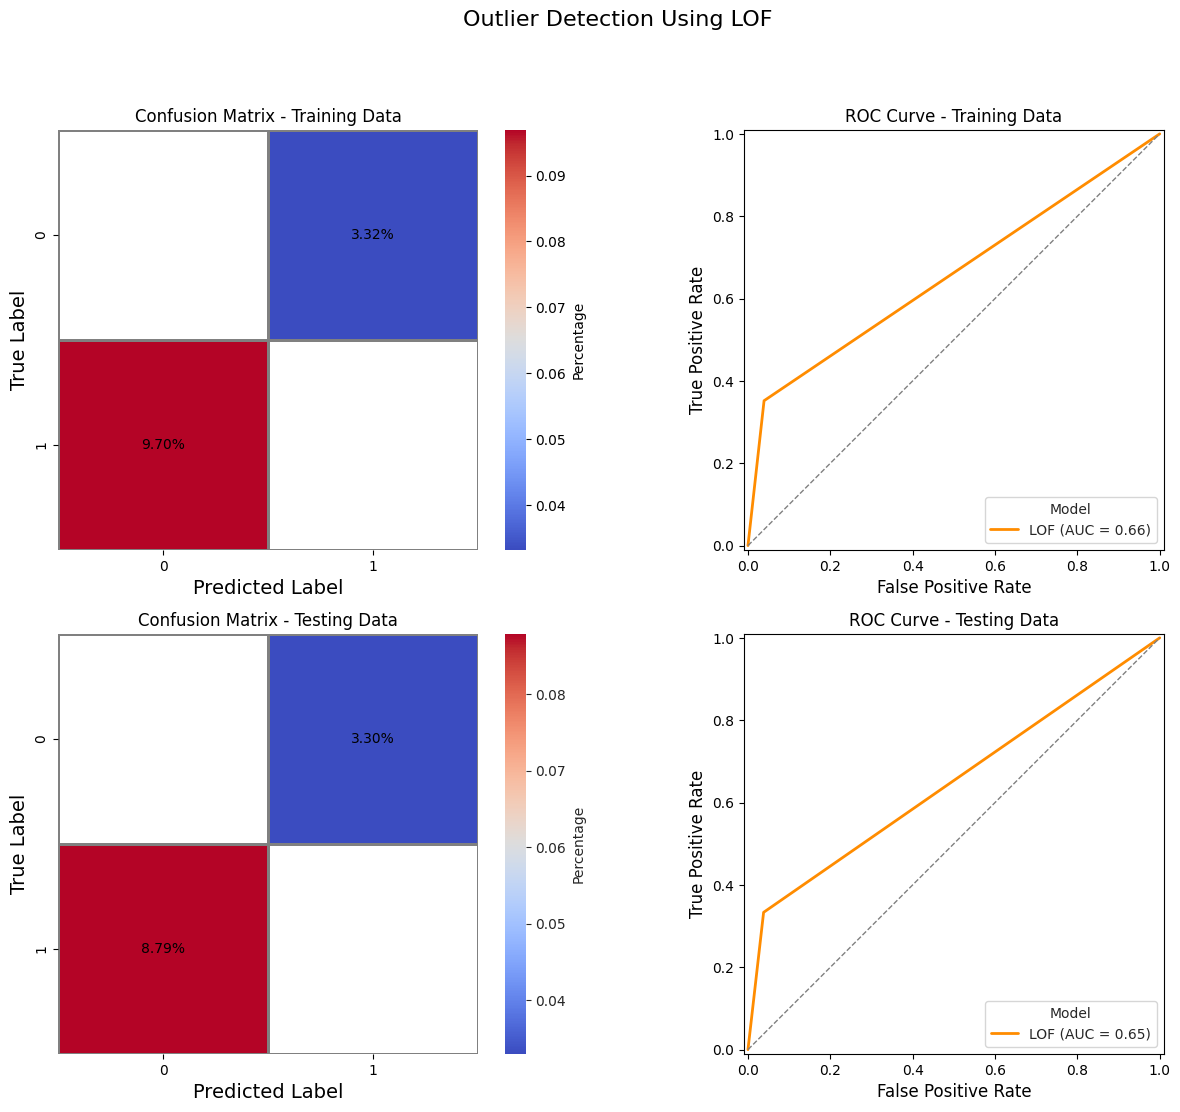

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

0

In [5]:
lof.visualize_outliers_lof(X_train, X_test, y_train, y_test,
                           train_pred=None,
                           test_pred=None,
                           novelty=False,
                           n_neighbors=25,
                           contamination='auto',
                           leaf_size=100,
                           metric="minkowski", p=1)

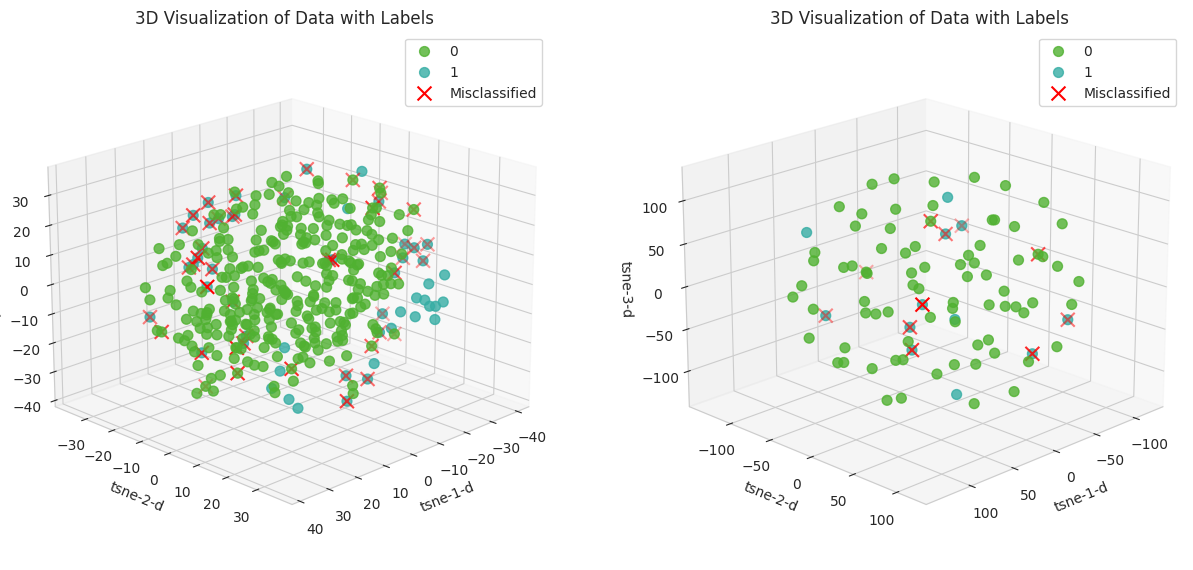

In [6]:
visualization_tool.visualize_results_3D_plane(X_train, y_train, X_test, y_test, lof_model_g, lof_y_pred_train_g)

### Bad accuracy

In [7]:
lof_y_pred_train_b, lof_y_score_train_b, lof_model_b = lof.detect_outliers(X_train,
                                      novelty = False,
                                      n_neighbors = 4,
                                      contamination = 'auto',
                                      leaf_size = 2,
                                      metric = "minkowski",
                                      p = 1)

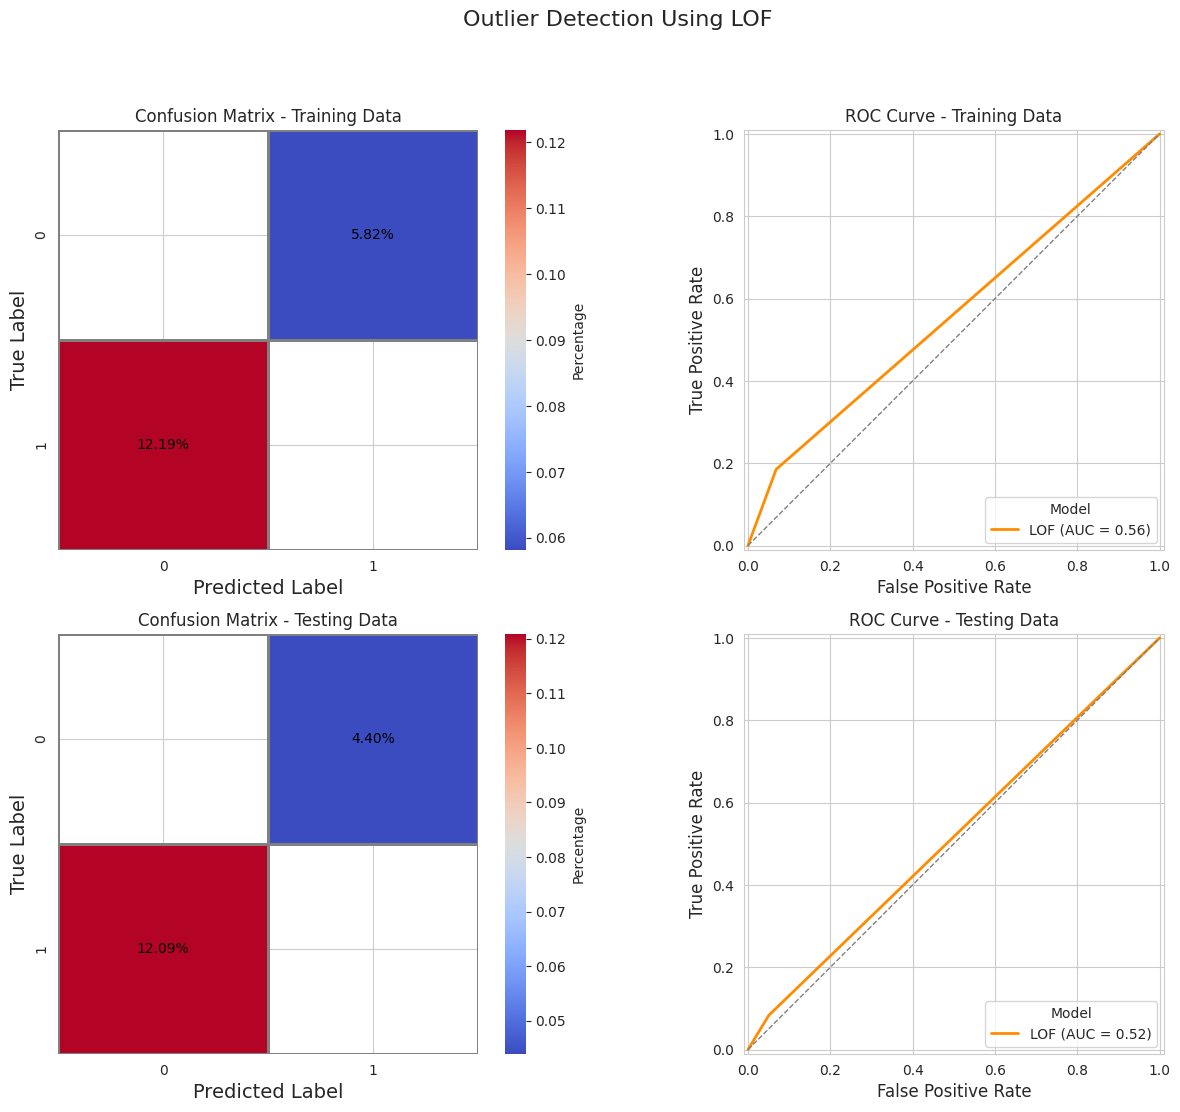

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

0

In [8]:
lof.visualize_outliers_lof(X_train, X_test, y_train, y_test,
                           train_pred=None,
                           test_pred=None,
                           novelty=False,
                           n_neighbors=4,
                           contamination='auto',
                           leaf_size=2,
                           metric="minkowski", p=1)

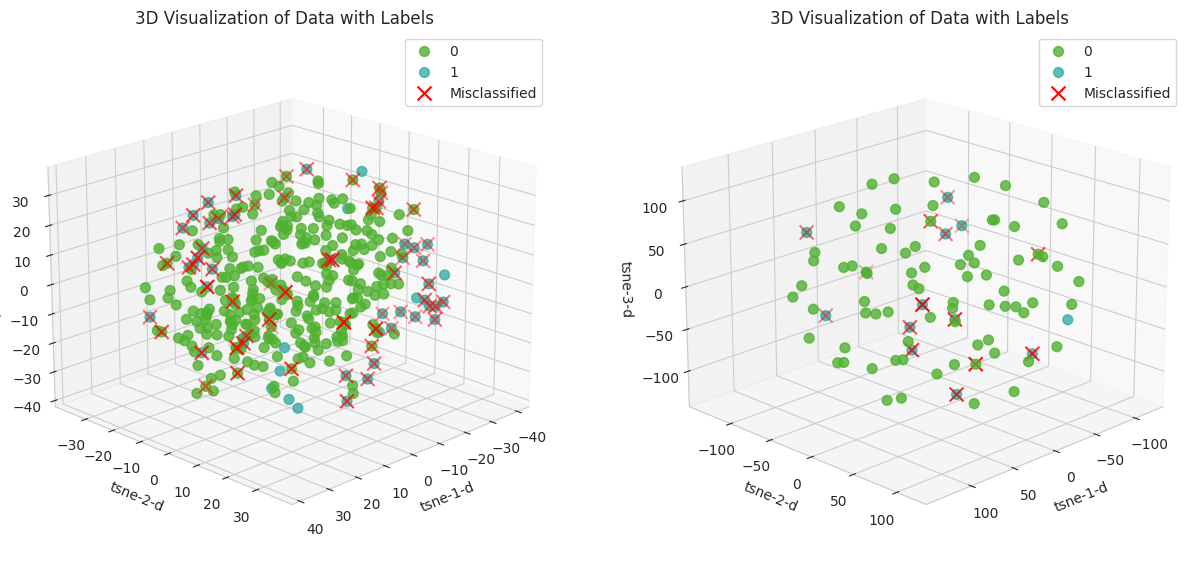

In [9]:
visualization_tool.visualize_results_3D_plane(X_train, y_train, X_test, y_test, lof_model_b, lof_y_pred_train_b)

### Mahalanobis distance

In [10]:
inliers_amount, outliers_amount = np.unique(y_train, return_counts=True)[1]
contamination = outliers_amount / inliers_amount

In [11]:
mahalanobis_y_pred_train_g, mahalanobis_model_g = mahalanobis.detect_outliers(X_train,
                                                                              contamination = contamination,
                                                                              random_state=42)

/home/jakub/miniconda3/envs/openset/lib/python3.10/site-packages/sklearn/covariance/_robust_covariance.py:747: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


/home/jakub/miniconda3/envs/openset/lib/python3.10/site-packages/sklearn/covariance/_robust_covariance.py:747: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


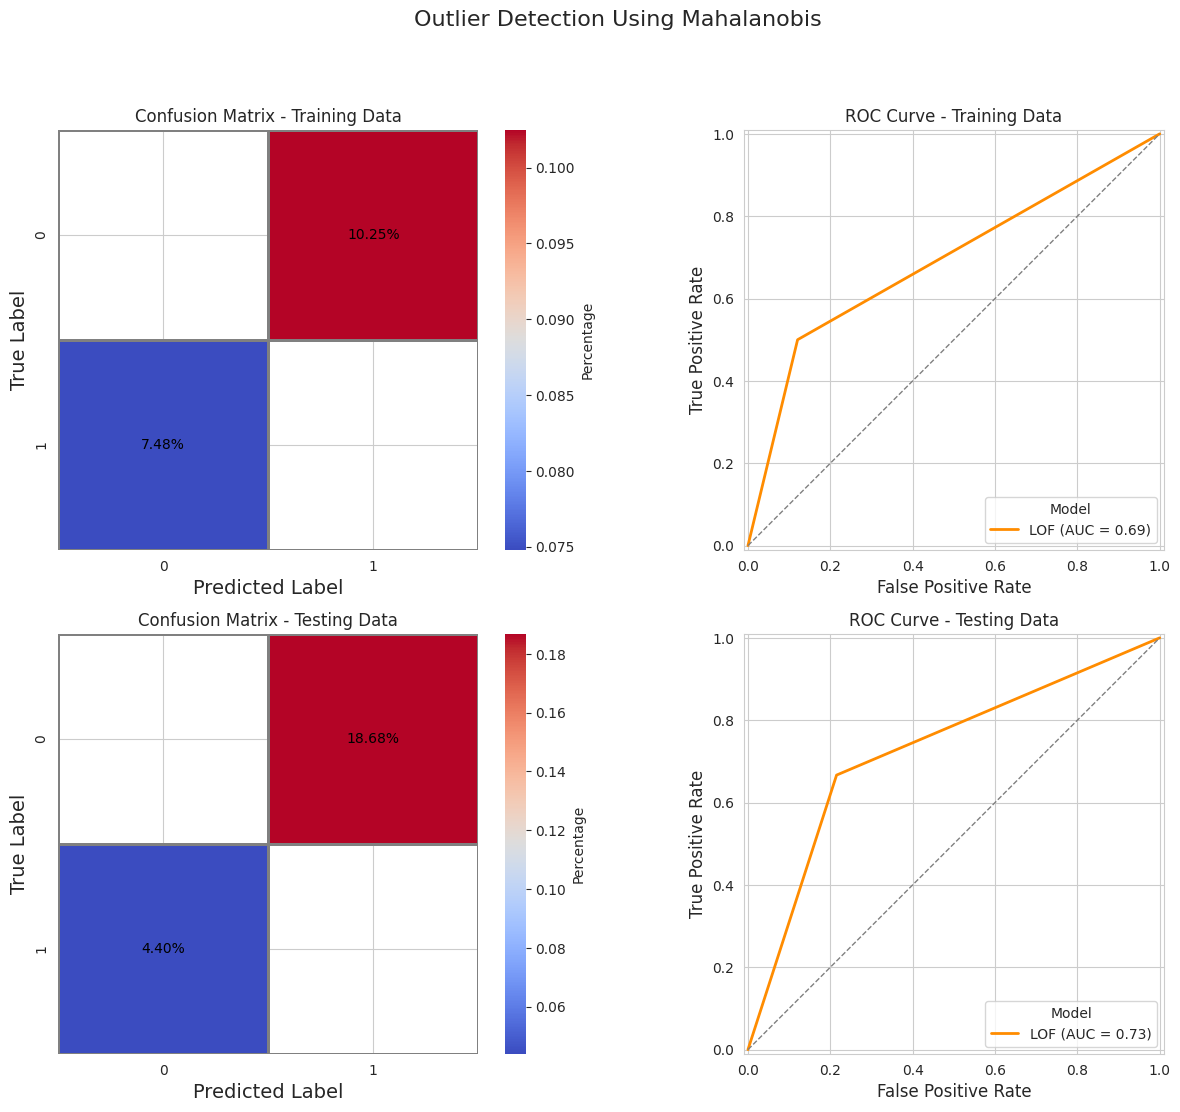

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

0

In [12]:
mahalanobis.visualize_outliers_mahalanobis(X_train,
                                           X_test,
                                           y_train,
                                           y_test,
                                           train_pred=None,
                                           test_pred=None,
                                           contamination=contamination,
                                           random_state=42)

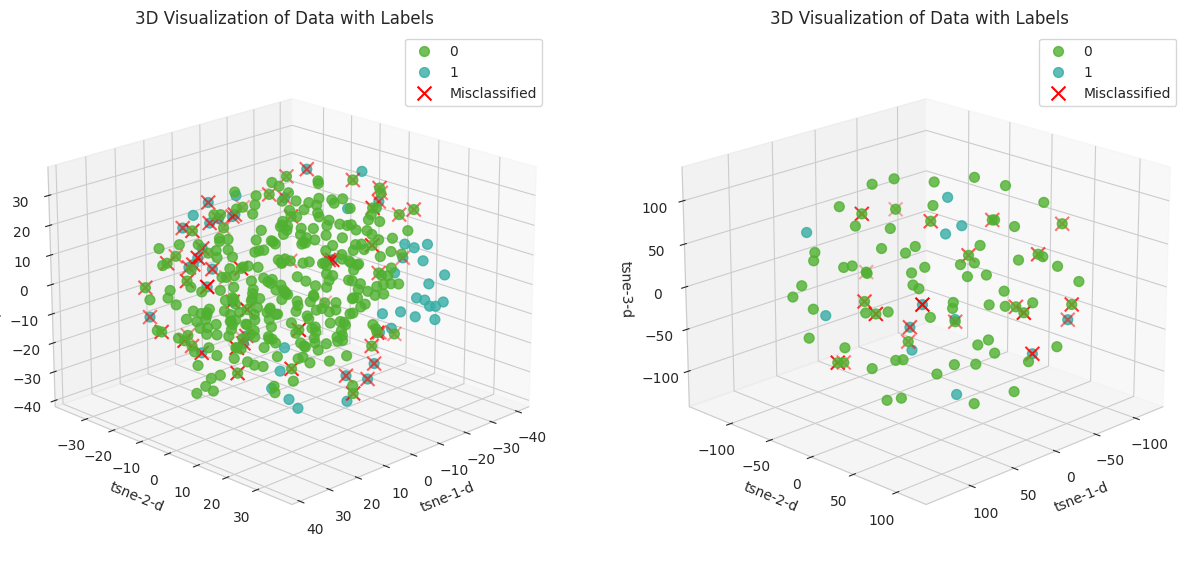

In [13]:
visualization_tool.visualize_results_3D_plane(X_train, y_train, X_test, y_test, mahalanobis_model_g, mahalanobis_y_pred_train_g, lof=False)

In [14]:
train_scores, test_scores, ood_scores = template.fit_and_score_model(mahalanobis_model_g,
                                                                     X_train,
                                                                     X_test,
                                                                     y_train)

/home/jakub/miniconda3/envs/openset/lib/python3.10/site-packages/sklearn/covariance/_robust_covariance.py:747: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


Model fitting completed in 13.44 seconds.
Scoring train data...
Scoring test data...
Scoring out-of-distribution data...


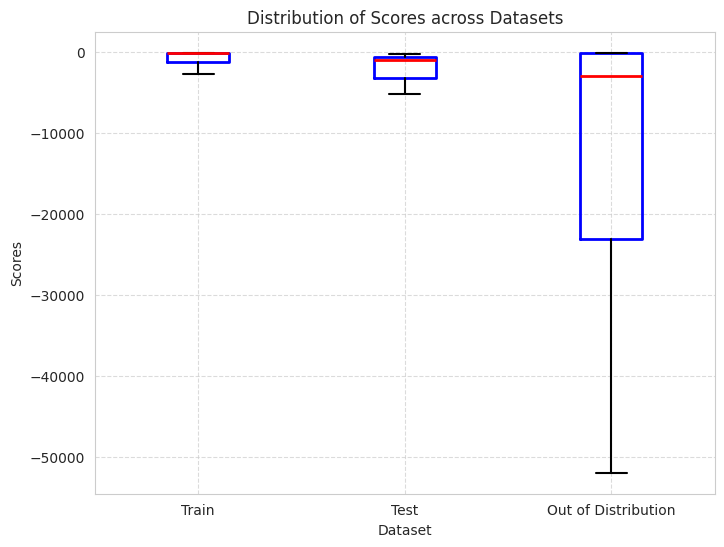

In [15]:
visualization_tool.plot_boxplot(train_scores, test_scores, ood_scores)

### IRW

In [16]:
model_irw = IRW_score.IRWDepth(contamination=contamination)
model_irw.fit(X_train)

Fitted IRWDepth model with 1000 projections in 274 dimensions.


True

In [17]:
model_irw._threshold = 0.23

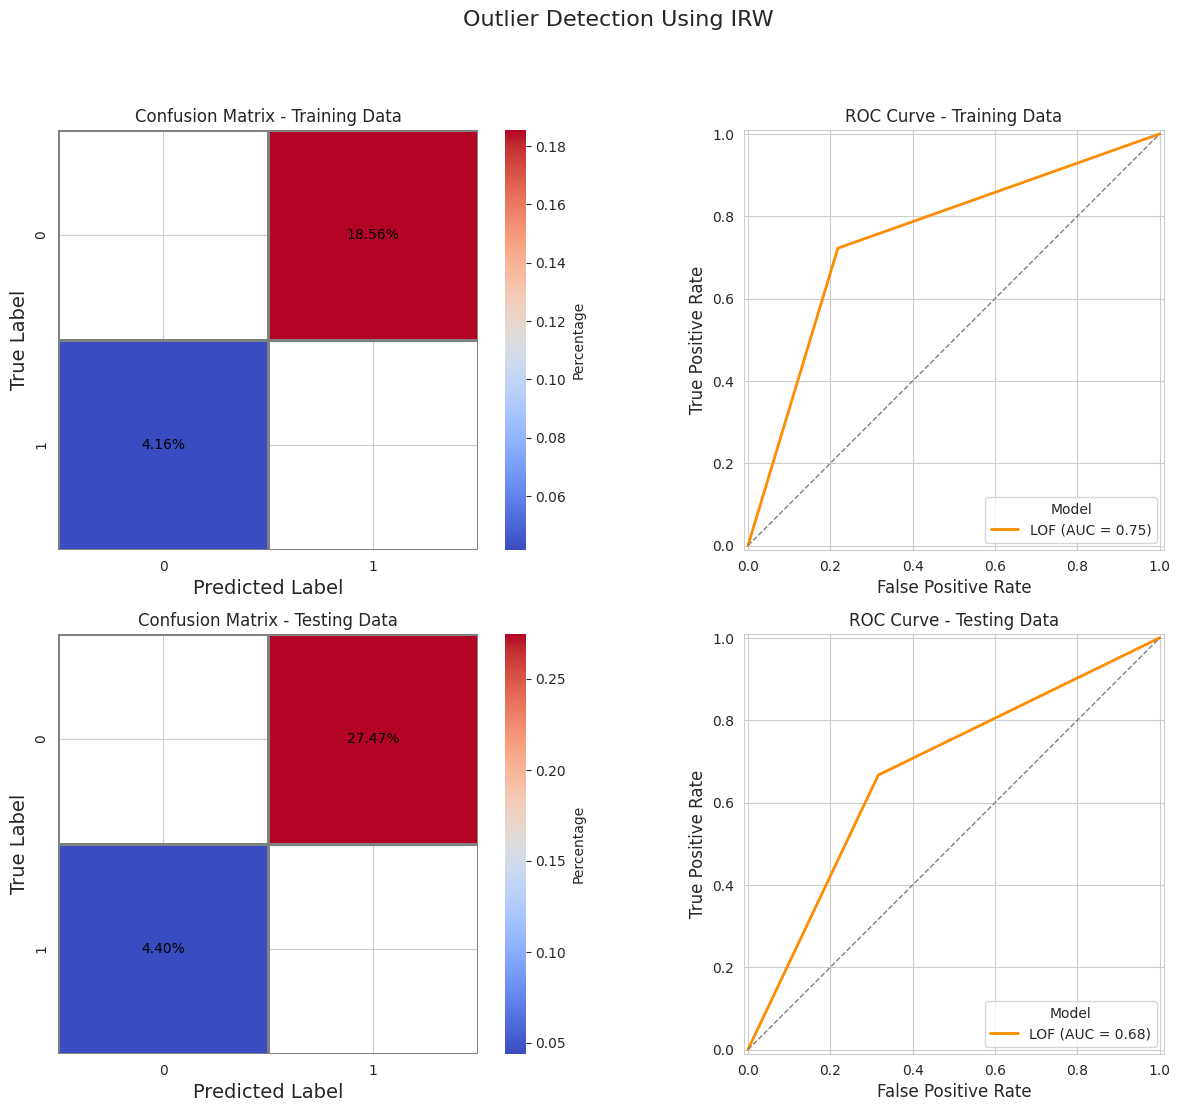

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

0

In [18]:
IRW_score.visualize_outliers_irw(X_train, X_test, y_train, y_test, model=model_irw)

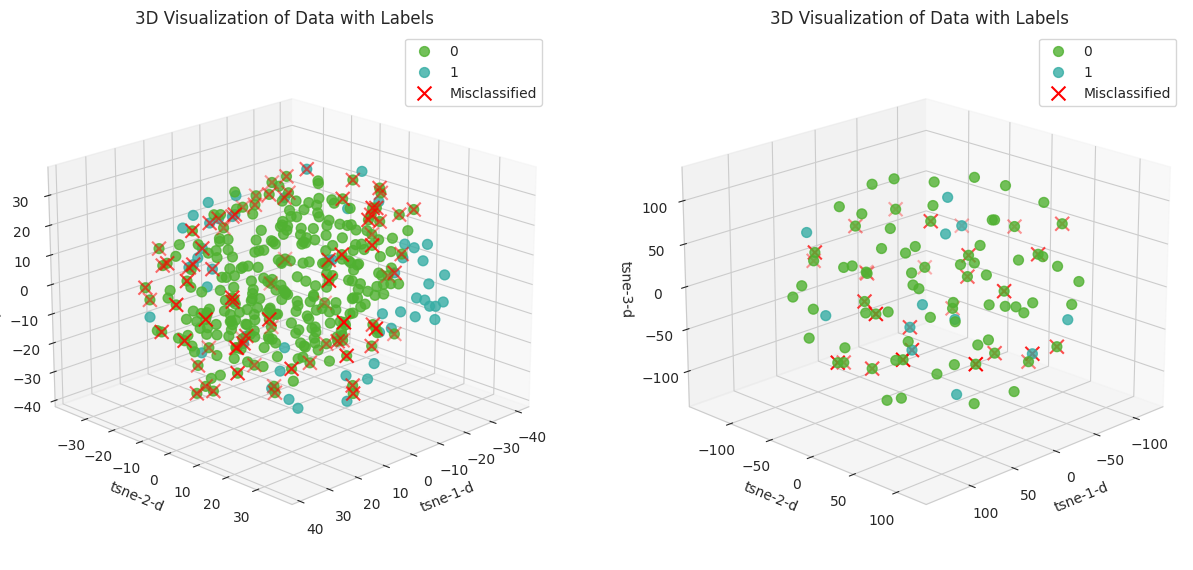

In [19]:
visualization_tool.visualize_results_3D_plane(X_train, y_train, X_test, y_test, model_irw, model_irw.predict(X_train), lof=False, irw=True)

In [20]:
train_scores, test_scores, ood_scores = template.fit_and_score_model(model_irw,
                                                                     X_train,
                                                                     X_test,
                                                                     y_train)

Fitted IRWDepth model with 1000 projections in 274 dimensions.
Model fitting completed in 0.01 seconds.
Scoring train data...
Scoring test data...
Scoring out-of-distribution data...


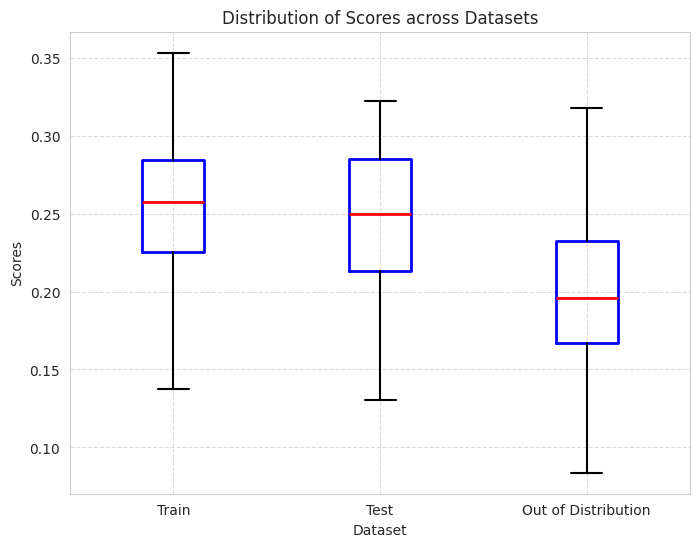

In [21]:
visualization_tool.plot_boxplot(train_scores, test_scores, ood_scores)